## Email Spam Detection Using Multinominal Niave Bayes

 The data set contains 20 categories of emails and our main motive is to read through all files of this 20 categories and count the frequency of different  words and store them in a dictionary.
 The emails contain stop words which we dont calculate the frequeny.

### Importing Libraries

In [2]:
import pandas as pd 

In [3]:
import numpy as np

In [4]:
import os

Defining stop words

In [5]:
stop_words = {"a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at",
               "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", 
               "can", "can't", "cannot", "could", "couldn't",
               "d", "did", "didn't", "do", "does", "doesn't", "doing", "don", "don't", "down", "during",
               "each", "few", "for", "from", "further", 
               "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", 
               "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", 
               "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", 
               "of", "off", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", 
               "same", "shan't", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", 
               "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", 
               "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't",
               "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"}

Reading through each file and storing words and its frequency in list

In [6]:
X = [] # X is futher made in form  tuple,where first element is document name and the other is content it contain
Y = [] # Y is the list of categories
for categorie in os.listdir("F:\\Machine Learning\\3.1. Solution\Datasets"):
    for document in os.listdir("F:\\Machine Learning\\3.1. Solution\Datasets\\"+ categorie):
        with open("F:\\Machine Learning\\3.1. Solution\Datasets\\"+categorie+'\\'+document,'r',encoding='utf-8', errors='ignore') as f:
            X.append((document,f.read())) 
            Y.append(categorie)


Let's  check the type of X and Y

In [7]:
print(type(X))
print(type(Y))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))

print(X[0])

<class 'list'>
<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

Lets split the data into train and test to fit in our model

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [9]:
import re
import string

In [10]:
#Example for showing re.split
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [14]:
# lets create a dictionary that stores the word and frequency
dic = {}
for i in range(len(X_train)):
    words = X_train[i][1].lower()
    stripped = re.split(r'\W',words)
    for s in stripped:
        if not(s.isalpha()) or s in stop_words or len(s)<=2:
            continue
        if s in dic:
            dic[s] += 1
        else:
            dic[s] =1

dic
        


{'xref': 4566,
 'cantaloupe': 19555,
 'srv': 24270,
 'cmu': 39355,
 'edu': 123562,
 'talk': 9215,
 'politics': 5842,
 'guns': 1930,
 'misc': 8968,
 'soc': 4564,
 'culture': 3166,
 'jewish': 1406,
 'newsgroups': 15285,
 'path': 15290,
 'das': 4537,
 'news': 25765,
 'harvard': 5184,
 'noc': 4646,
 'near': 5152,
 'net': 19162,
 'howland': 8242,
 'reston': 8226,
 'ans': 8316,
 'bogus': 1052,
 'sura': 2806,
 'darwin': 1827,
 'sgiblab': 325,
 'wetware': 147,
 'spunky': 77,
 'redbrick': 71,
 'com': 37175,
 'psinntp': 404,
 'billg': 14,
 'bony': 222,
 'bill': 1588,
 'gripp': 10,
 'subject': 16240,
 'next': 1549,
 'mormons': 368,
 'jews': 1259,
 'message': 16478,
 'organization': 14837,
 'references': 9749,
 'usenet': 6155,
 'ins': 1430,
 'cwru': 2027,
 'midway': 379,
 'uchicago': 559,
 'ucsu': 384,
 'colorado': 1236,
 'terminator': 68,
 'itd': 164,
 'umich': 477,
 'date': 15599,
 'tue': 1809,
 'apr': 15474,
 'gmt': 13317,
 'lines': 15678,
 'article': 10048,
 'jlove': 14,
 'ivrit': 20,
 'jack':

In [15]:
import operator

In [19]:
#Sorting the dictionary on basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 123562),
 ('cmu', 39355),
 ('com', 37175),
 ('news', 25765),
 ('srv', 24270),
 ('cantaloupe', 19555),
 ('net', 19162),
 ('message', 16478),
 ('subject', 16240),
 ('lines', 15678),
 ('date', 15599),
 ('apr', 15474),
 ('path', 15290),
 ('newsgroups', 15285),
 ('organization', 14837),
 ('state', 14239),
 ('gmt', 13317),
 ('ohio', 12036),
 ('one', 11709),
 ('will', 11534),
 ('writes', 11009),
 ('article', 10048),
 ('comp', 9955),
 ('references', 9749),
 ('talk', 9215),
 ('misc', 8968),
 ('ans', 8316),
 ('howland', 8242),
 ('sender', 8236),
 ('reston', 8226),
 ('people', 7726),
 ('like', 7648),
 ('university', 7467),
 ('just', 7369),
 ('posting', 7319),
 ('nntp', 7021),
 ('mps', 6959),
 ('know', 6705),
 ('host', 6680),
 ('sci', 6622),
 ('get', 6432),
 ('zaphod', 6269),
 ('think', 6169),
 ('usenet', 6155),
 ('may', 5943),
 ('alt', 5933),
 ('politics', 5842),
 ('windows', 5605),
 ('also', 5595),
 ('time', 5300),
 ('rutgers', 5262),
 ('harvard', 5184),
 ('use', 5170),
 ('near', 5152),

Now visualize the data 


In [20]:
import matplotlib.pyplot as plt

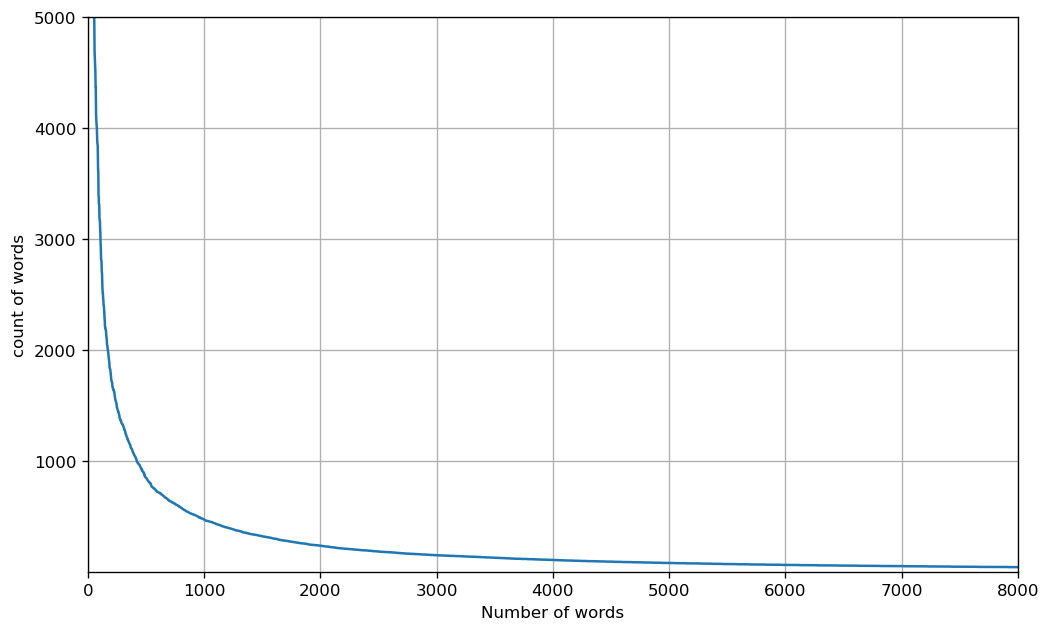

In [26]:
plt.figure(figsize=(10,6),dpi=120,edgecolor='r',facecolor='w')
answer1=[]
answer2=[]
for i in range(len(sorted_dic)):
    answer1.append(i)
    answer2.append(sorted_dic[i][1])

plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.xlabel('Number of words')
plt.ylabel('count of words')
plt.grid()
plt.show()

In [28]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[sorted_dic[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'path',
 'newsgroups',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'howland',
 'sender',
 'reston',
 'people',
 'like',
 'university',
 'just',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'zaphod',
 'think',
 'usenet',
 'may',
 'alt',
 'politics',
 'windows',
 'also',
 'time',
 'rutgers',
 'harvard',
 'use',
 'near',
 'eng',
 'new',
 'rec',
 'good',
 'sei',
 'crabapple',
 'noc',
 'xref',
 'soc',
 'system',
 'das',
 'well',
 'now',
 'cis',
 'max',
 'even',
 'see',
 'god',
 'religion',
 'europa',
 'gtefsd',
 'org',
 'world',
 'uunet',
 'ece',
 'way',
 'say',
 'make',
 'christian',
 'two',
 'many',
 'gov',
 'much',
 'first',
 'rochester',
 'right',
 'distribution',
 'club',
 'andrew',
 'mail',
 'space',
 'gatech',
 'magnesium',
 'anyone',
 'want',
 'reply',
 'utexas

In [35]:
# NOw lets create a numpy array of zeros and travel through the train data and find the frequency of words that are top 2000 and record the frequency 
x_train_dataset = np.zeros([len(X_train),len(answer1)],int)
for i in range(len(X_train)):
    words = X_train[i][1].lower()
    word = re.split(r'\W+',words)
    for w in word:
        if w in answer1:
            x_train_dataset[i][answer1.index(w)]+=1

In [36]:
x_test_dataset = np.zeros([len(X_test),len(answer1)],int)
for i in range(len(X_test)):
    words = X_test[i][1].lower()
    word = re.split(r'\W+',words)
    for w in word:
        if w in answer1:
            x_test_dataset[i][answer1.index(w)]+=1

In [37]:
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 9  2  3 ...  0  0  0]
 [ 4  1  4 ...  0  0  0]
 [ 2  2  8 ...  0  0  0]
 ...
 [ 5  1  6 ...  0  0  0]
 [ 9  3  0 ...  0  0  0]
 [13  1  1 ...  0  0  0]]
--------------------------
[[ 9  4  0 ...  0  0  0]
 [ 7  4  7 ...  0  0  0]
 [10  3  8 ...  0  0  0]
 ...
 [ 2  1  7 ...  0  0  0]
 [17  3  0 ...  0  0  0]
 [ 3  1  0 ...  0  0  0]]


In [38]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_dataset,Y_train)
y_pred = clf.predict(x_test_dataset)


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.81      0.82       233
           comp.graphics       0.84      0.79      0.82       253
 comp.os.ms-windows.misc       0.85      0.78      0.81       249
comp.sys.ibm.pc.hardware       0.68      0.82      0.74       240
   comp.sys.mac.hardware       0.75      0.86      0.80       236
          comp.windows.x       0.87      0.71      0.78       240
            misc.forsale       0.83      0.90      0.86       261
               rec.autos       0.88      0.92      0.90       269
         rec.motorcycles       0.91      0.97      0.94       284
      rec.sport.baseball       0.93      0.92      0.92       248
        rec.sport.hockey       0.93      0.96      0.94       231
               sci.crypt       0.96      0.97      0.96       233
         sci.electronics       0.88      0.88      0.88       244
                 sci.med       0.94      0.86      0.90       256
         

In [40]:
confusion_matrix(Y_test,y_pred)

array([[189,   0,   0,   0,   0,   0,   1,   2,   2,   0,   0,   0,   1,
          2,   0,   1,   0,   0,   0,  35],
       [  0, 201,  12,  21,   4,   8,   3,   2,   0,   1,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0],
       [  0,   9, 193,  18,   5,  15,   2,   1,   0,   0,   0,   1,   3,
          1,   1,   0,   0,   0,   0,   0],
       [  0,   0,   3, 196,  32,   0,   5,   0,   1,   0,   0,   0,   3,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,  24, 204,   0,   6,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [  0,  17,  19,  11,  11, 171,   2,   0,   0,   0,   0,   1,   5,
          1,   2,   0,   0,   0,   0,   0],
       [  0,   0,   1,   7,   3,   0, 234,   6,   2,   0,   1,   0,   6,
          0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   1,   0,  11, 247,   3,   1,   1,   0,   4,
          0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   5, 275,   2,   0,  